# Massey Ratings

In [1]:
import sys

sys.path.append("../")
import penaltyblog as pb

In [2]:
fbd = pb.scrapers.FootballData("ENG Premier League", "2020-2021")
df = fbd.get_fixtures()

df.head()

div  \
competition        season    id                                              
ENG Premier League 2020-2021 1599868800---crystal_palace---southampton  E0   
                             1599868800---fulham---arsenal              E0   
                             1599868800---liverpool---leeds_united      E0   
                             1599868800---west_ham---newcastle_united   E0   
                             1599955200---tottenham_hotspur---everton   E0   

                                                                                team_home  \
competition        season    id                                                             
ENG Premier League 2020-2021 1599868800---crystal_palace---southampton     Crystal Palace   
                             1599868800---fulham---arsenal                         Fulham   
                             1599868800---liverpool---leeds_united              Liverpool   
                             1599868800---west_ham---newcastle_united            West Ham   
                             1599955200---tottenham_hotspur---everton   Tottenham Hotspur   

                                                                               team_away  \
competition        season    id                                                            
ENG Premier League 2020-2021 1599868800---crystal_palace---southampton       Southampton   
                             1599868800---fulham---arsenal                       Arsenal   
                             1599868800---liverpool---leeds_united          Leeds United   
                             1599868800---west_ham---newcastle_united   Newcastle United   
                             1599955200---tottenham_hotspur---everton            Everton   

                                                                        fthg  \
competition        season    id                                                
ENG Premier League 2020-2021 1599868800---crystal_palace---southampton     1   
                             1599868800---fulham---arsenal                 0   
                             1599868800---liverpool---leeds_united         4   
                             1599868800---west_ham---newcastle_united      0   
                             1599955200---tottenham_hotspur---everton      0   

                                                                        ftag  \
competition        season    id                                                
ENG Premier League 2020-2021 1599868800---crystal_palace---southampton     0   
                             1599868800---fulham---arsenal                 3   
                             1599868800---liverpool---leeds_united         3   
                             1599868800---west_ham---newcastle_united      2   
                             1599955200---tottenham_hotspur---everton      1   

                                                                       ftr  \
competition        season    id                                              
ENG Premier League 2020-2021 1599868800---crystal_palace---southampton   H   
                             1599868800---fulham---arsenal               A   
                             1599868800---liverpool---leeds_united       H   
                             1599868800---west_ham---newcastle_united    A   
                             1599955200---tottenham_hotspur---everton    A   

                                                                        hthg  \
competition        season    id                                                
ENG Premier League 2020-2021 1599868800---crystal_palace---southampton     1   
                             1599868800---fulham---arsenal                 0   
                             1599868800---liverpool---leeds_united         3   
                             1599868800---west_ham---newcastle_united      0   
                             1599955200---tottenham_hotspur---everton      0  

In [3]:
massey = pb.ratings.Massey(df["fthg"], df["ftag"], df["team_home"], df["team_away"])
massey.get_ratings()

,team,rating,offence,defence
0,Manchester City,1.275,1.486184,-0.211184
1,Manchester United,0.725,1.238962,-0.513962
2,Liverpool,0.65,1.10424,-0.45424
3,Tottenham Hotspur,0.575,1.108406,-0.533406
4,Chelsea,0.55,0.832018,-0.282018
5,Leicester City,0.45,1.115351,-0.665351
6,Arsenal,0.4,0.757018,-0.357018
7,West Ham,0.375,0.952851,-0.577851
8,Aston Villa,0.225,0.76674,-0.54174
9,Leeds United,0.2,0.962573,-0.762573


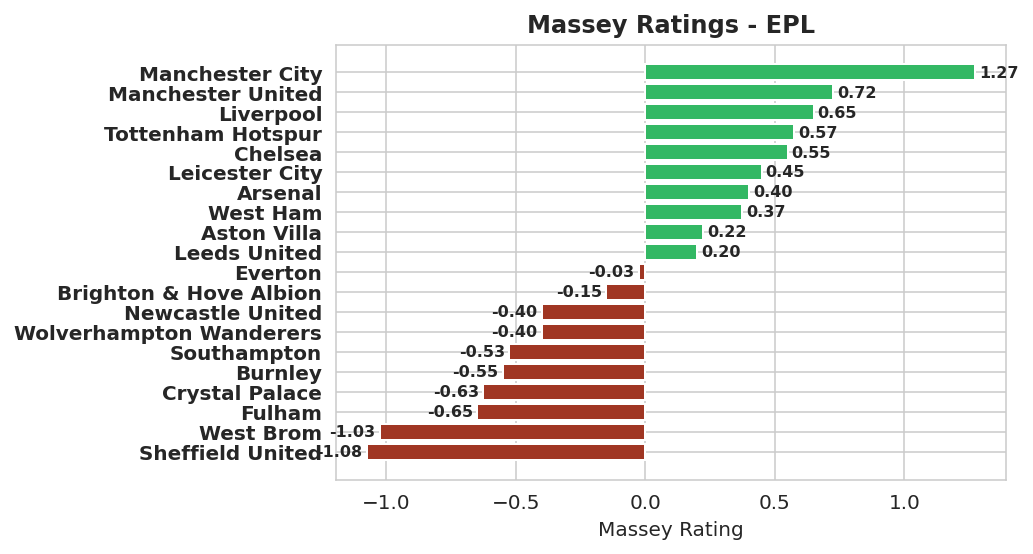

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

ratings = pb.massey.ratings(df["fthg"], df["ftag"], df["team_home"], df["team_away"])
ratings["colours"] = np.where(ratings["rating"] > 0, "#33b864", "#a03623")
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["rating"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Ratings - EPL", fontweight="bold")

rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )

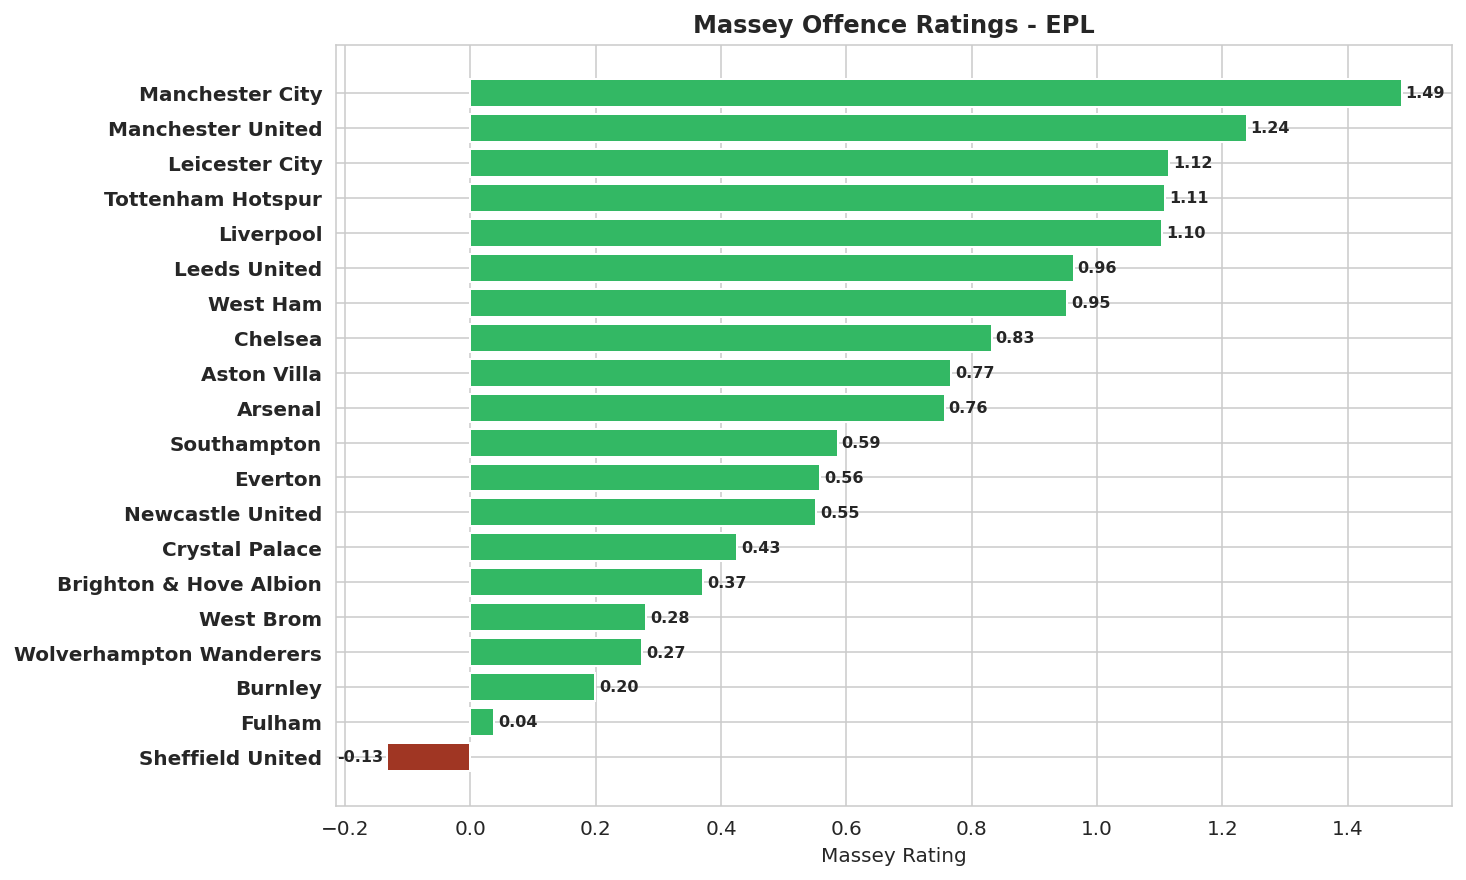

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

ratings = pb.massey.ratings(df["fthg"], df["ftag"], df["team_home"], df["team_away"])
ratings["colours"] = np.where(ratings["offence"] > 0, "#33b864", "#a03623")
ratings = ratings.sort_values("offence", ascending=False)
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["offence"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Offence Ratings - EPL", fontweight="bold")

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )

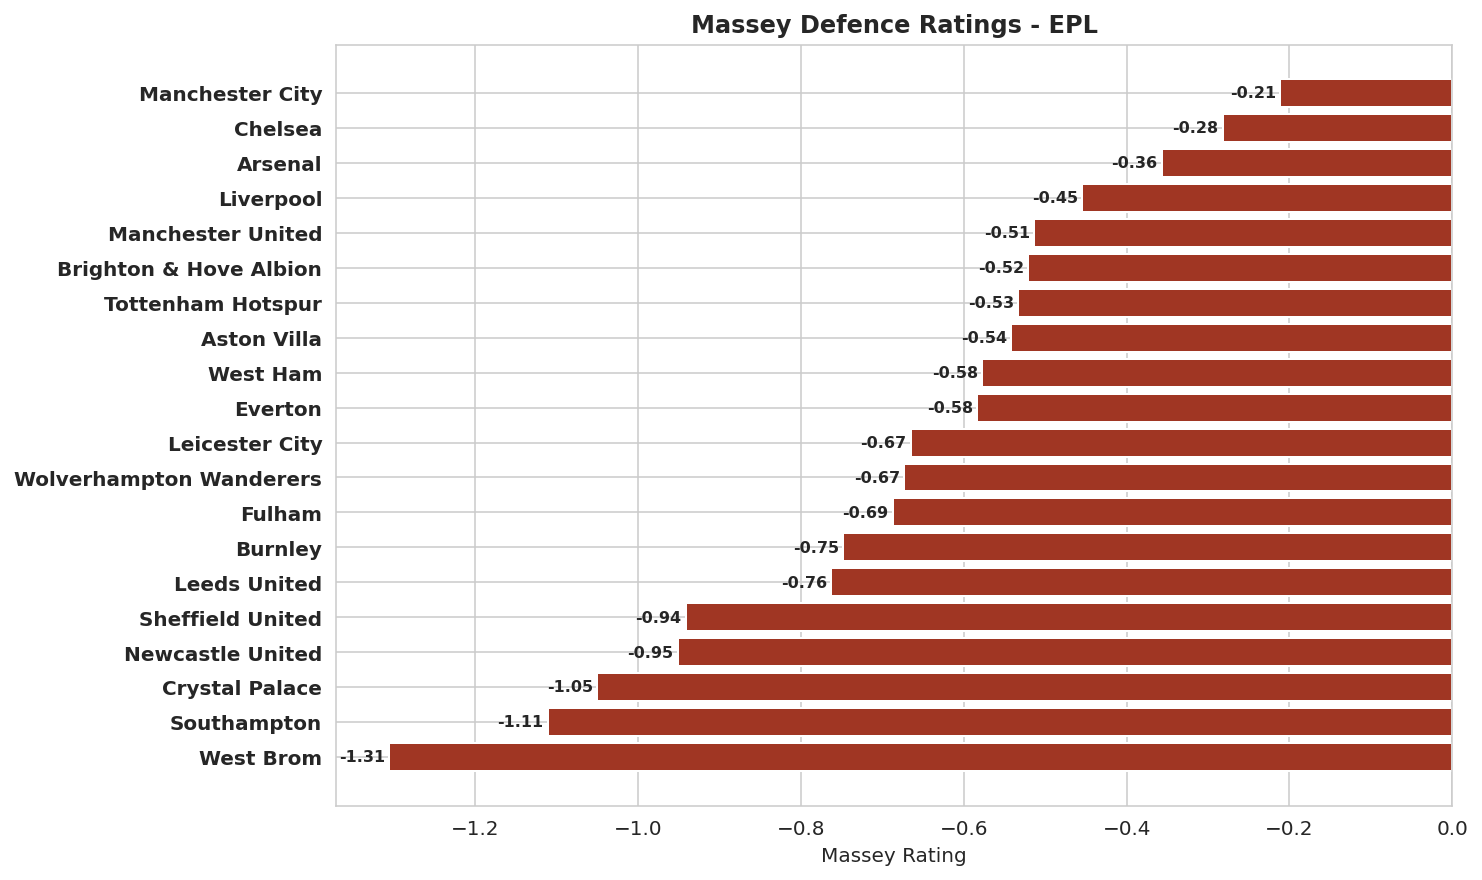

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = [10, 7]
sns.set_style("whitegrid")

ratings = pb.massey.ratings(df["fthg"], df["ftag"], df["team_home"], df["team_away"])
ratings["colours"] = np.where(ratings["defence"] > 0, "#33b864", "#a03623")
ratings = ratings.sort_values("defence", ascending=False)
fig, ax = plt.subplots()
y_pos = np.arange(len(ratings))
performance = ratings["defence"]
ax.barh(y_pos, performance, align="center", color=ratings["colours"])
ax.set_yticks(y_pos)
ax.set_yticklabels(ratings["team"], fontweight="bold")
ax.invert_yaxis()
ax.set_xlabel("Massey Rating")
ax.set_title("Massey Defence Ratings - EPL", fontweight="bold")

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 2
    ha = "left"

    if x_value < 0:
        space *= -1
        ha = "right"

    label = "{:.2f}".format(x_value)

    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords="offset points",
        va="center",
        ha=ha,
        fontsize=8,
        fontweight="bold",
    )